'/home/wsuser/work'

In [ ]:
#sprint-2
#create model

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

In [ ]:
model=Sequential()

In [ ]:
#add layers

In [ ]:
model.add(Convolution2D(32,(3,3),input_shape=(192,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(32))
model.add(Dense(6,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 190, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 95, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 93, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 46, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 44160)             0         
                                                                 
 dense (Dense)               (None, 32)                1

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit_generator(generator=x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))

/tmp/wsuser/ipykernel_164/1926459362.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))


Epoch 1/10
480/480 [==============================] - 327s 679ms/step - loss: 1.5080 - accuracy: 0.4747 - val_loss: 1.5269 - val_accuracy: 0.3193
Epoch 2/10
480/480 [==============================] - 326s 679ms/step - loss: 0.7394 - accuracy: 0.7544 - val_loss: 0.7448 - val_accuracy: 0.7364
Epoch 3/10
480/480 [==============================] - 323s 672ms/step - loss: 0.3862 - accuracy: 0.8810 - val_loss: 0.8211 - val_accuracy: 0.8113
Epoch 4/10
480/480 [==============================] - 323s 673ms/step - loss: 0.3552 - accuracy: 0.8918 - val_loss: 0.7482 - val_accuracy: 0.7848
Epoch 5/10
480/480 [==============================] - 323s 673ms/step - loss: 0.3435 - accuracy: 0.8977 - val_loss: 0.8243 - val_accuracy: 0.8275
Epoch 6/10
480/480 [==============================] - 322s 670ms/step - loss: 0.3232 - accuracy: 0.9007 - val_loss: 0.7220 - val_accuracy: 0.8116
Epoch 7/10
480/480 [==============================] - 331s 689ms/step - loss: 0.3285 - accuracy: 0.9021 - val_loss: 0.6537 -

In [ ]:

model.save('ECG.h5')


In [ ]:
!tar -zcvf image-Classification-model_new.tgz ECG.h5

ECG.h5


In [ ]:
ls -1

data/
ECG.h5
image-Classification-model_new.tgz


In [ ]:
#testing the model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model("ECG.h5")

In [ ]:
img1=image.load_img(r'data/test/Premature Ventricular Contractions/VEBfig_13.png')

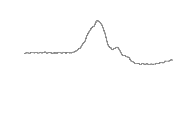

In [ ]:
img1

In [ ]:
img1=img1.resize((128,192))

In [ ]:
x=image.img_to_array(img1)

In [ ]:
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [ ]:
import numpy as np

In [ ]:
x=np.expand_dims(x,axis=0)

In [ ]:
y=np.argmax(model.predict(x))

In [ ]:
y

3

In [ ]:
index=['Left Bundle Branch Block','Normal','Premature Atrial Contractions','Premature Ventricular Contractions','Right Bundle Branch Block','Ventricular Fibrillation']

In [ ]:
index[y]

'Premature Ventricular Contractions'

In [ ]:
client.repository.download(model_id,'my_model.tar.gz')

In [ ]:
import tensorflow as tf
tf.__version__

'2.7.2'

In [ ]:
!pip install keras==2.2.4

     |████████████████████████████████| 312 kB 21.5 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 14.6 MB/s eta 0:00:01
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.7.2 requires keras<2.8,>=2.7.0, but you have keras 2.2.4 which is incompatible.


In [ ]:
#deployment
!pip install watson-machine-learning--Client

     |████████████████████████████████| 538 kB 21.9 MB/s eta 0:00:01


In [ ]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"jODT-AnyGz3AWuG_kZdrQUOBNM5whihNrQnnLZ-h1x3U"
}
client=APIClient(wml_credentials)

In [ ]:
client


In [ ]:
def guid_space_name(client,img_class):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name']==ecg_deploy)['metadata']['id'])

In [ ]:
space_uid=guid_space_name(client,'ecg_deploy')
print("Space UID"+space_uid)

StopIteration: 

In [ ]:
client.set.default_space(space_uid)

NameError: name 'space_uid' is not defined

In [ ]:
software_space_uid=client.software_specifications.get_uid_by_name('tensorflow_1.15-py3.6')

In [ ]:
software_space_uid

'2b73a275-7cbf-420b-a912-eae7f436e0bc'

In [ ]:
model_details=client.repository.store_model(model='ECG.h5',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN",
    client.repository.ModelMetaNames.TYPE:'KERAS_2.2.4',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})
model_id=client.repository.get_model_uid(model_details)

Saving trained model in repository failed. 'ECG.h5' file does not have valid format


WMLClientError: Saving trained model in repository failed. 'ECG.h5' file does not have valid format

In [ ]:
model_id

In [ ]:
client.repository.download(model_id,'my_model.tar.gz')

In [ ]:
client.repository.download(model_id,'fruit-training.ter.gz')

NameError: name 'model_id' is not defined